<a href="https://colab.research.google.com/github/JoshuneArriaga/Apendizaje_Automatico/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL: https://www.kaggle.com/datasets/mubeenshehzadi/infant-wellness-and-risk-evaluation-dataset

In [28]:
import pandas as pd
from scipy.stats import shapiro, skew, kurtosis
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/content/newborn_health_monitoring_with_risk.csv")
df.head()

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-10,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-11,2,3.35,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-12,3,3.35,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-13,4,3.48,...,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-14,5,3.50,...,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk


In [4]:
df.dtypes

,0
baby_id,object
name,object
gender,object
gestational_age_weeks,float64
birth_weight_kg,float64
birth_length_cm,float64
birth_head_circumference_cm,float64
date,object
age_days,int64
weight_kg,float64


## **Verificar si las variables son paramétricos o no paramétricos**





In [13]:
# Identificar variables numericas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Variables numericas:")
print(numerical_cols)

Numerical variables in the dataset:
Index(['gestational_age_weeks', 'birth_weight_kg', 'birth_length_cm',
       'birth_head_circumference_cm', 'age_days', 'weight_kg', 'length_cm',
       'head_circumference_cm', 'temperature_c', 'heart_rate_bpm',
       'respiratory_rate_bpm', 'oxygen_saturation',
       'feeding_frequency_per_day', 'urine_output_count', 'stool_count',
       'jaundice_level_mg_dl', 'apgar_score'],
      dtype='object')


In [21]:
parametricas = []
no_parametricas = []

for col in numerical_cols:
    data = df[col].dropna()
    # Prueba de normalidad (sensible con n grandes)
    stat, p = shapiro(data.sample(500, random_state=1) if len(data)>500 else data)  # muestrar 500 para Shapiro
    # Checar asimetría y curtosis
    skewness = skew(data)
    kurt = kurtosis(data)  # 0=normal en esta función
    if (abs(skewness)<1 and abs(kurt)<1) or p>0.05:
        parametricas.append(col)
    else:
        no_parametricas.append(col)

print("Variables paramétricas:")
print(parametricas)
print("\nVariables no paramétricas:")
print(no_parametricas)

Variables paramétricas:
['gestational_age_weeks', 'birth_weight_kg', 'birth_length_cm', 'birth_head_circumference_cm', 'weight_kg', 'length_cm', 'head_circumference_cm', 'temperature_c', 'heart_rate_bpm', 'respiratory_rate_bpm', 'oxygen_saturation']

Variables no paramétricas:
['age_days', 'feeding_frequency_per_day', 'urine_output_count', 'stool_count', 'jaundice_level_mg_dl', 'apgar_score']


## **Estadísticas descriptivas**

In [12]:
df.describe()

,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,100.000000
mean,38.878000,3.205000,49.727000,34.128000,15.500000,3.669730,50.508000,34.438900,37.002933,139.682000,39.421333,97.473000,9.450000,6.470000,2.448333,4.163467,8.400000
std,1.570076,0.561555,2.145065,1.486254,8.656884,0.621355,2.196846,1.500893,0.310747,10.139386,4.999481,1.048318,1.707182,1.700803,1.699106,2.861971,1.163415
min,35.400000,1.860000,45.100000,31.200000,1.000000,1.790000,45.000000,31.100000,35.800000,100.000000,23.000000,94.000000,7.000000,4.000000,0.000000,0.000000,7.000000
25%,37.800000,2.870000,48.475000,32.975000,8.000000,3.220000,49.100000,33.300000,36.800000,133.000000,36.000000,97.000000,8.000000,5.000000,1.000000,2.500000,7.000000
50%,38.800000,3.165000,49.550000,34.100000,15.500000,3.660000,50.400000,34.400000,37.000000,140.000000,39.000000,97.000000,9.000000,6.000000,2.000000,3.300000,8.000000
75%,40.100000,3.625000,51.025000,34.800000,23.000000,4.100000,51.800000,35.300000,37.200000,146.000000,43.000000,98.000000,11.000000,8.000000,4.000000,4.300000,9.250000
max,43.000000,4.470000,55.800000,38.100000,30.000000,5.410000,57.400000,38.700000,38.100000,173.000000,57.000000,101.000000,12.000000,9.000000,5.000000,15.000000,10.000000


## **Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma**



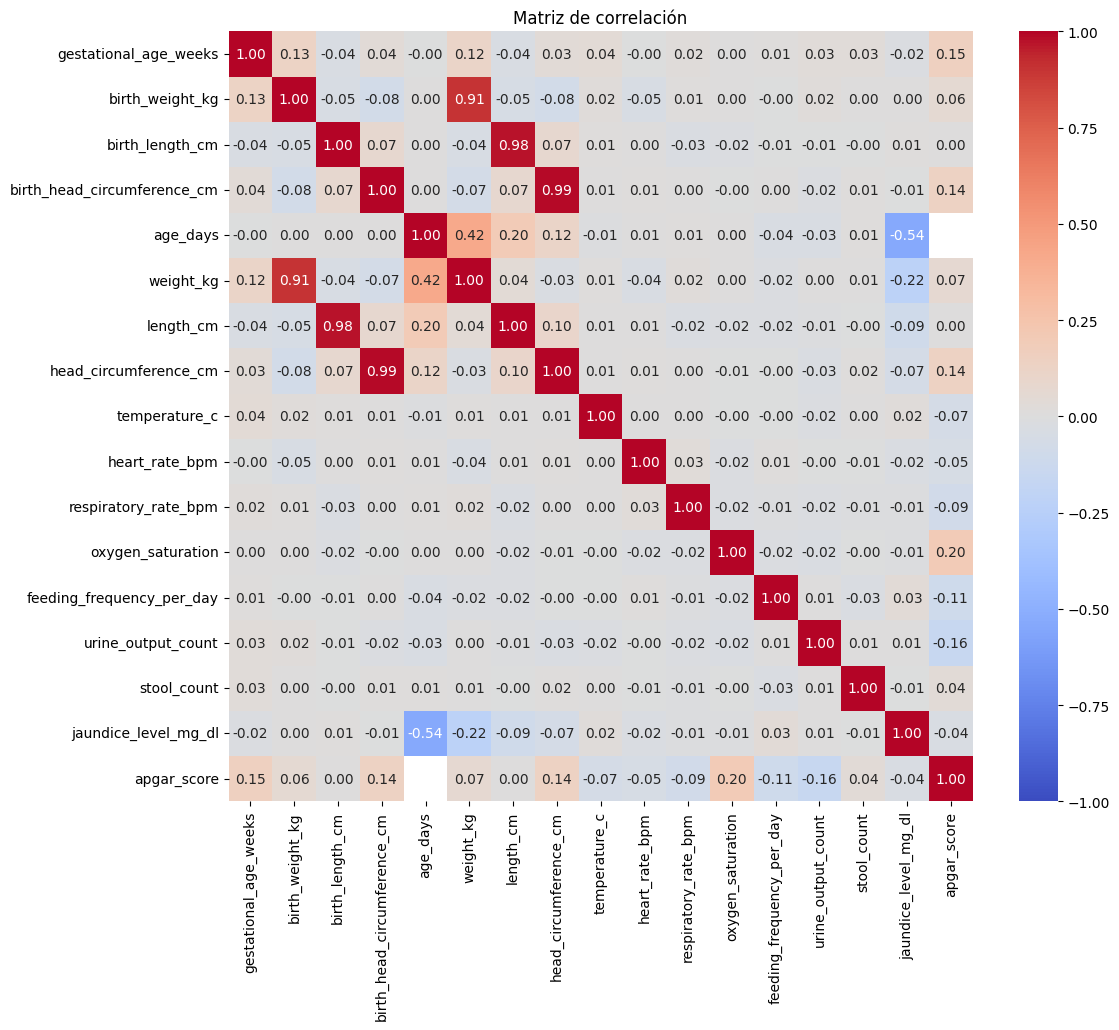

In [26]:
correlation_matrix_df = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', fmt=".2f", vmin = -1, vmax = 1)
plt.title('Matriz de correlación')
plt.show()

### **Variables muy correlacionadas**

*   birth_weight_kg – weight_kg (r≈0.91) El peso actual se asocia muy fuertemente con el peso al nacer.
*   birth_length_cm – length_cm (r≈0.98) La longitud actual se asocia muy fuertemente con la longitud al nacer.
*   birth_head_circumference_cm – head_circumference_cm (r≈0.99) La circunferencia actual de la cabeza se asocia muy fuertemente con la circunferencia al nacer.


## **Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación**

Saber si la correlación entre el peso al nacer y el peso actual es significativamente distinta de cero (es decir, si existe asociación real)

H₀: ρ = 0 (no hay correlación lineal entre peso al nacer y peso actual)

H₁: ρ ≠ 0 (sí hay correlación lineal entre peso al nacer y peso actual)

In [29]:
x = df['birth_weight_kg'].dropna()
y = df['weight_kg'].dropna()

r, p_valor = stats.pearsonr(x, y)

n = len(x)
t_stat = r * np.sqrt((n - 2) / (1 - r**2))
gl = n - 2

print(f"r = {r:.3f}")
print(f"t = {t_stat:.2f} con {gl} grados de libertad")
print(f"p-value = {p_valor:.5f}")

r = 0.905
t = 116.65 con 2998 grados de libertad
p-value = 0.00000


Se rechaza H₀: existe correlación significativa

## **Presenta tus resultados gráficamente**

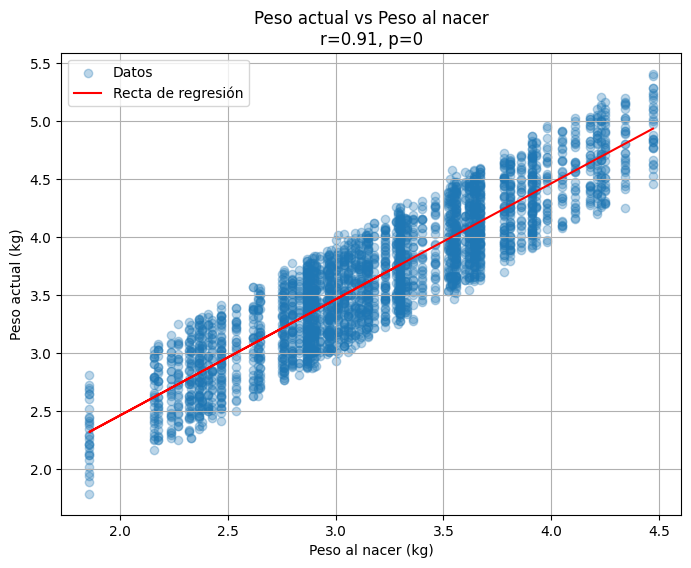

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.3, label='Datos')
slope, intercept, _, _, _ = stats.linregress(x, y)
plt.plot(x, intercept + slope*x, color='red', label='Recta de regresión')

plt.title(f'Peso actual vs Peso al nacer\nr={r:.2f}, p={p_valor:.3g}')
plt.xlabel('Peso al nacer (kg)')
plt.ylabel('Peso actual (kg)')
plt.legend()
plt.grid(True)
plt.show()